# Image processing

The core of this project is to do the image processing of the phase space reconstruction scan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import yaml
import os

In [2]:
# change this depending on where the data is stored
data_directory = '/Users/jp/awa_data/2024_01_18_6D_PSR'

In [3]:
# load the scan data from yaml file
scan_yaml_fname = os.path.join(data_directory, 'scan5.yml')
scan_data = yaml.safe_load(open(scan_yaml_fname, 'r'))
scan_data

[{'AWA:Bira3Ctrl:Ch10': -0.4,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [1e-09, 1.1e-09, 1e-09, 1.1e-09, 1e-09],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan/DYG14_1705615074.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.3,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [1.1e-09, 1.1e-09, 1e-09, 1.1e-09, 1.1e-09],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan/DYG14_1705615084.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.2,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [1.1e-09, 1e-09, 1e-09, 1e-09, 1.1e-09],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan/DYG14_1705615096.h5'},
 {'AWA:Bira3Ctrl:Ch10': -0.1,
  'AWA:Bira4Ctrl:Ch01': 0.0,
  'AWAVXI11ICT:Ch4': [1e-09, 1.1e-09, 1e-09, 1e-09, 1e-09],
  'pi:QBCR1:Ch7:EnablePulse': 0,
  'save_filename': '/home/awa/awa_data/01-18_6DReconstruction/recon

In [4]:
# lets load it in a pandas dataframe for ease of use
scan_df = pd.DataFrame(scan_data)
scan_df

,AWA:Bira3Ctrl:Ch10,AWA:Bira4Ctrl:Ch01,AWAVXI11ICT:Ch4,pi:QBCR1:Ch7:EnablePulse,save_filename
0,-0.4,0.00,"[1e-09, 1.1e-09, 1e-09, 1.1e-09, 1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
1,-0.3,0.00,"[1.1e-09, 1.1e-09, 1e-09, 1.1e-09, 1.1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
2,-0.2,0.00,"[1.1e-09, 1e-09, 1e-09, 1e-09, 1.1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
3,-0.1,0.00,"[1e-09, 1.1e-09, 1e-09, 1e-09, 1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
4,0.0,0.00,"[1.1e-09, 1.1e-09, 1e-09, 1.1e-09, 1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
5,0.1,0.00,"[1e-09, 1.1e-09, 1e-09, 1e-09, 1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
6,0.2,0.00,"[1e-09, 1e-09, 1.1e-09, 1e-09, 1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
7,0.3,0.00,"[1.1e-09, 1.1e-09, 1.1e-09, 1e-09, 1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
8,0.4,0.00,"[1e-09, 1.1e-09, 1e-09, 1.1e-09, 1.1e-09]",0,/home/awa/awa_data/01-18_6DReconstruction/reco...
9,-0.4,0.00,"[1.1e-09, 1e-09, 1e-09, 1e-09, 1e-09]",1,/home/awa/awa_data/01-18_6DReconstruction/reco...


In [5]:
# define relevant keys for image file name, quad strength, dipole value, and transverse deflecting cavity value:
img_fname_key = 'save_filename'
quad_key = 'AWA:Bira3Ctrl:Ch10'
tdc_key = 'pi:QBCR1:Ch7:EnablePulse'
dipole_key = 'AWA:Bira4Ctrl:Ch01'

In [6]:
# redifine dataframe with only columns that we care about:
scan_df = scan_df[[img_fname_key, quad_key, tdc_key, dipole_key]]
scan_df

,save_filename,AWA:Bira3Ctrl:Ch10,pi:QBCR1:Ch7:EnablePulse,AWA:Bira4Ctrl:Ch01
0,/home/awa/awa_data/01-18_6DReconstruction/reco...,-0.4,0,0.00
1,/home/awa/awa_data/01-18_6DReconstruction/reco...,-0.3,0,0.00
2,/home/awa/awa_data/01-18_6DReconstruction/reco...,-0.2,0,0.00
3,/home/awa/awa_data/01-18_6DReconstruction/reco...,-0.1,0,0.00
4,/home/awa/awa_data/01-18_6DReconstruction/reco...,0.0,0,0.00
5,/home/awa/awa_data/01-18_6DReconstruction/reco...,0.1,0,0.00
6,/home/awa/awa_data/01-18_6DReconstruction/reco...,0.2,0,0.00
7,/home/awa/awa_data/01-18_6DReconstruction/reco...,0.3,0,0.00
8,/home/awa/awa_data/01-18_6DReconstruction/reco...,0.4,0,0.00
9,/home/awa/awa_data/01-18_6DReconstruction/reco...,-0.4,1,0.00


In [7]:
# reshape dataframe to index by tdc and dipole values, and quad strengths as columns
scan_df_reshaped = scan_df.pivot(index=[dipole_key, tdc_key], columns=quad_key, values=img_fname_key)

In [8]:
scan_df_reshaped

AWA:Bira3Ctrl:Ch10                                                                        -0.4  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                        -0.3  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                        -0.2  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                        -0.1  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                         0.0  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                         0.1  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                         0.2  \
AWA:Bira4Ctrl:Ch01 pi:QBCR1:Ch7:EnablePulse                                                      
-3.66              0                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
                   1                         /home/awa/awa_data/01-18_6DReconstruction/reco...   
 0.00              0                         /home/awa/awa_data/01-18_6DRe

In [14]:
# split df into on and off dipole dataframes
dipole_off_df = scan_df_reshaped.loc[0]
dipole_off_df

AWA:Bira3Ctrl:Ch10,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4
pi:QBCR1:Ch7:EnablePulse,,,,,,,,,
0,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...
1,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...


In [25]:
dipole_on_df = scan_df_reshaped.loc[-3.66]
dipole_on_df

AWA:Bira3Ctrl:Ch10,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4
pi:QBCR1:Ch7:EnablePulse,,,,,,,,,
0,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...
1,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...,/home/awa/awa_data/01-18_6DReconstruction/reco...


In [43]:
# now we have two df, one for dipole off data and one for dipole on data. 
# each df is a 2D table with rows given by transverse deflecting cavity state and columns given by quad strength. 
# the fields are the image file path + name.
# let's see one of the fields:
dipole_off_df.loc[(1, -0.4)]

'/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan/DYG14_1705615167.h5'

## **TASK**:

As you can see, the image filename field is the full path where I saved the h5 file in the control room computer. Define a function `get_file_path` that takes the full path string from the control room computer and returns the file path string with the correct path where you saved the data, i.e, for 

`'/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan/DYG14_1705615074.h5'` 

it should return `'[data_directory_path_in_your_pc]/DYG14_1705615074.h5'`. 

Don't forget adding a docstring for the function. 

In [ ]:
def get_file_path(full_path: str) -> str:
    ## INSERT YOUR CODE HERE

In [45]:
# test the function:
test_file_name = get_file_path(dipole_on_df.loc[(1, -0.4)])
test_file_name

'/Users/jp/awa_data/2024_01_18_6D_PSR/DYG15_1705615417.h5'

In [46]:
# get a test h5 file:
test_img_h5 = h5py.File(test_file_name, 'r')
test_img_h5

<HDF5 file "DYG15_1705615417.h5" (mode r)>

In [61]:
# load hdf5 file
test_img_dataset = test_img_h5['images']

# get array with images and print the shape
test_img_array = test_img_dataset[()]
test_img_array.shape

(5, 700, 700)

In [ ]:
# the shape means that we have 5 images of 700x700 pixels in a single 
# quad+tdc+dipole combination

In [60]:
# see attributes of the file
test_img_attrs = dict(test_img_dataset.attrs)
test_img_attrs

{'AWA:Bira3Ctrl:Ch10': np.float64(-0.4),
 'AWA:Bira4Ctrl:Ch01': np.float64(-3.66),
 'AWAVXI11ICT:Ch4': array([9.66919245e-10, 1.01223345e-09, 1.04715122e-09, 1.04478446e-09,
        1.02679423e-09]),
 'alias': 'DYG15',
 'array_data_suffix': 'image1:ArrayData',
 'array_n_cols_suffix': 'image1:ArraySize0_RBV',
 'array_n_rows_suffix': 'image1:ArraySize1_RBV',
 'background_file': '/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan/DYG15_background.npy',
 'bounding_box_half_width': np.float64(3.0),
 'charge_atol': np.float64(1e-10),
 'extra_pvs': array([], dtype=float64),
 'gain': np.float64(15.0),
 'ip_address': '192.168.2.139',
 'min_log_intensity': np.float64(4.0),
 'n_fitting_restarts': np.int64(1),
 'pi:QBCR1:Ch7:EnablePulse': np.int64(1),
 'resolution': np.float64(1.0),
 'return_statistics': np.False_,
 'roi': "{'xcenter': 591, 'ycenter': 1079, 'xwidth': 700, 'ywidth': 700}",
 'save_image_location': '/home/awa/awa_data/01-18_6DReconstruction/reconstruction_scan',
 'screen_n

In [49]:
# print the attributes we care about:
print(f"quad strength `k`: {test_img_attrs[quad_key]}")
print(f"dipole `g`: {test_img_attrs[dipole_key]}")
print(f"transverse deflecting cavity state `tdc`: {test_img_attrs[tdc_key]}")

quad strength `k`: -0.4
dipole `g`: -3.66
transverse deflecting cavity state `tdc`: 1


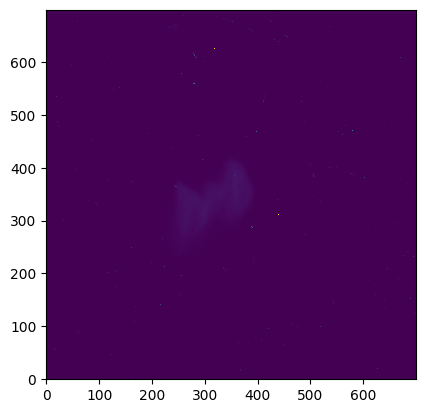

In [57]:
# see the first image:
plt.imshow(test_img_array[0].T, origin='lower', interpolation='none') # note the transpose and lower origin since imshow does (row,column) instead of (x,y). 
plt.show()

## **TASK**:

show the 5 images of the test file using a for loop

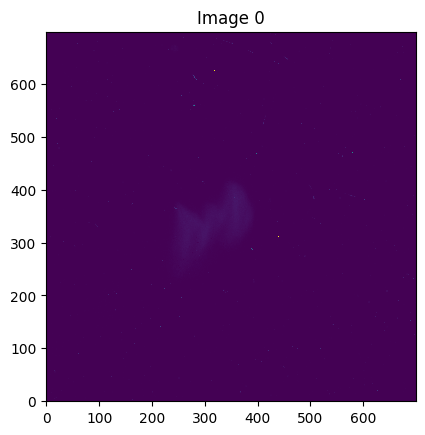

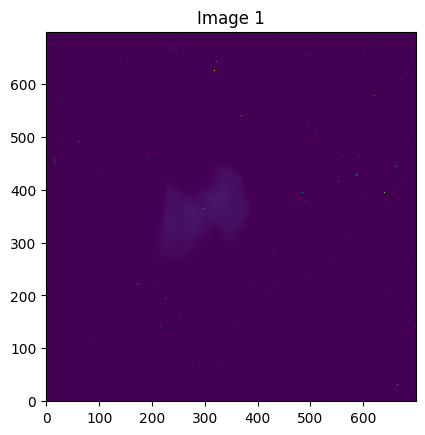

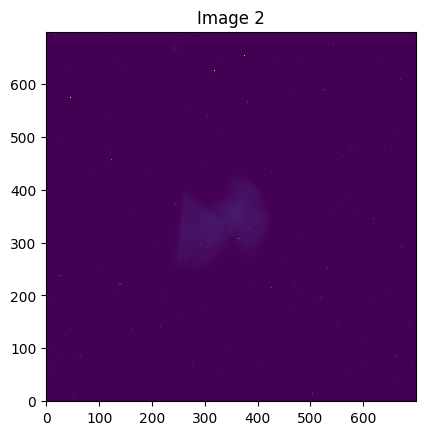

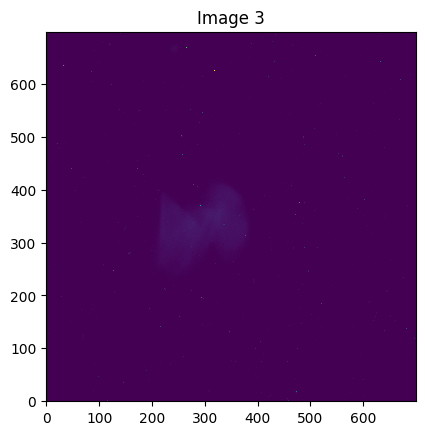

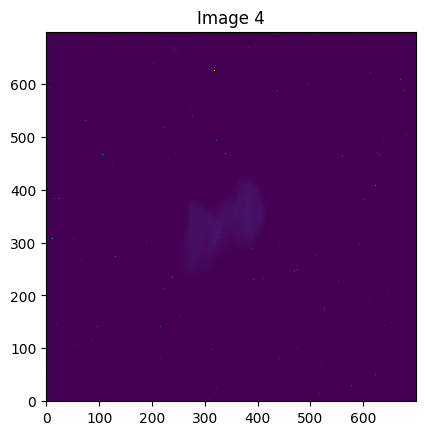

In [ ]:
## INSERT YOUR CODE HERE


Text(0.5, 1.0, 'Post-processed image')

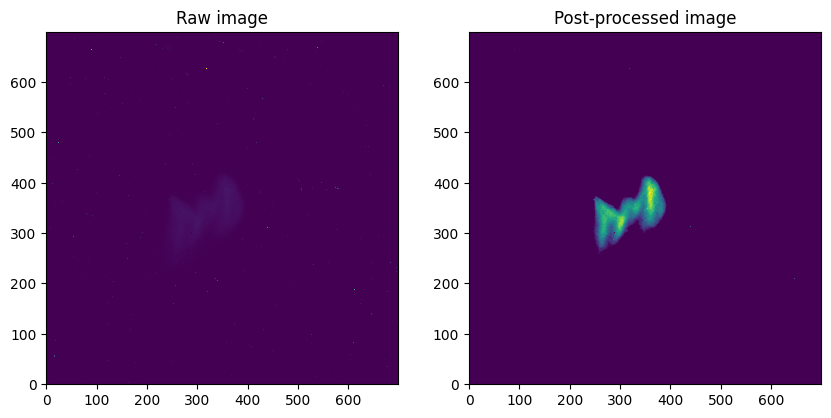

In [121]:
# Let's do the image post processing:
from skimage import filters
from scipy.ndimage import median_filter

# copy image to post-process:
pp_image = test_img_array[0].copy()

# normalize:
pp_image = pp_image / pp_image.sum()

# triangle threshold:
threshold_multiplier = 2.0
thresh = filters.threshold_triangle(pp_image) * threshold_multiplier
pp_image = np.clip(pp_image - thresh, 0, None)

# median filter:
median_filter_size = 4
pp_image = median_filter(pp_image, median_filter_size)

# normalize again after pp:
pp_image = pp_image / pp_image.sum()

# plot it and compare with raw image:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(
    test_img_array[0].T,
    interpolation='none',
    origin='lower'
)
ax[0].set_title('Raw image')
ax[1].imshow(
    pp_image.T,
    interpolation='none',
    origin='lower'
)
ax[1].set_title('Post-processed image')

## **TASK**

Define a function `post_process` that takes the image array and does the post processing as in the previous cell for all images in the array. Should return new array of post processed images. Note: be careful to not overwrite the original image array data. use `.copy()` to avoid this.

In [ ]:
def post_process(raw_img_array: np.ndarray) -> np.ndarray:
    
    ## INSERT YOUR CODE HERE

    return pp_image_array

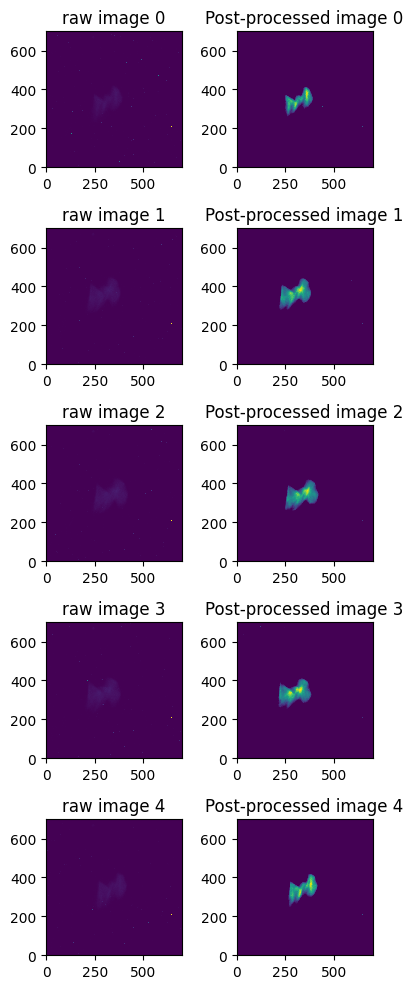

In [131]:
# plot it and compare with raw images:
fig, ax = plt.subplots(5, 2, figsize=(4,10))
pp_image_array = post_process(test_img_array)
for i in range(test_img_array.shape[0]):
    ax[i,0].set_title(f'raw image {i}')
    ax[i,0].imshow(
        test_img_array[i].T,
        interpolation='none',
        origin='lower'
    )
    ax[i,1].set_title(f'Post-processed image {i}')
    ax[i,1].imshow(
        pp_image_array[i].T,
        interpolation='none',
        origin='lower'
    )
fig.tight_layout()

In [ ]:
# now lets do this for all images in the data

In [137]:
# we need the dimensions:
n_images_per_combination = test_img_array.shape[0]
pixels_x = test_img_array.shape[1]
pixels_y = test_img_array.shape[2]
n_tdc_states = dipole_off_df.shape[0]
n_quad_strengths = dipole_off_df.shape[1]

In [140]:
# define arrays for pp images and attributes:
dipole_off_pp_images = np.zeros((n_tdc_states, n_quad_strengths, n_images_per_combination, pixels_x, pixels_y))
dipole_off_attrs = np.zeros((n_tdc_states, n_quad_strengths, 2))
dipole_on_pp_images = np.zeros_like(dipole_off_pp_images)
dipole_on_attrs = np.zeros_like(dipole_off_attrs)

In [142]:
dipole_off_pp_images.shape # dimension is tdc state, quad strength, image number, pixel x, pixel y

(2, 9, 5, 700, 700)

In [143]:
dipole_off_attrs.shape # the last dimension of size 2 comes to store both quad and tdc values

(2, 9, 2)

In [146]:
# go over all tdc states and quad strengths and post-process the images:
for i in range(dipole_off_pp_images.shape[0]):
    for j in range(dipole_off_pp_images.shape[1]):
        # get the file name:
        dipole_off_file_name = get_file_path(dipole_off_df.iloc[i,j])
        dipole_on_file_name = get_file_path(dipole_on_df.iloc[i,j])
        # load the h5 file:
        dipole_off_h5 = h5py.File(dipole_off_file_name, 'r')
        dipole_on_h5 = h5py.File(dipole_on_file_name, 'r')
        # load the dataset:
        dipole_off_dataset = dipole_off_h5['images']
        dipole_on_dataset = dipole_on_h5['images']
        # get the array:
        dipole_off_array = dipole_off_dataset[()]
        dipole_on_array = dipole_on_dataset[()]
        # post-process the images:
        dipole_off_pp_images[i,j] = post_process(dipole_off_array)
        dipole_on_pp_images[i,j] = post_process(dipole_on_array)
        # get the attributes:
        dipole_off_attrs[i,j] = [dipole_off_dataset.attrs[quad_key], dipole_off_dataset.attrs[tdc_key]]
        dipole_on_attrs[i,j] = [dipole_on_dataset.attrs[quad_key], dipole_on_dataset.attrs[tdc_key]]
        # close the h5 files:
        dipole_off_h5.close()
        dipole_on_h5.close()

In [151]:
dipole_off_pp_images.shape

(2, 9, 5, 700, 700)

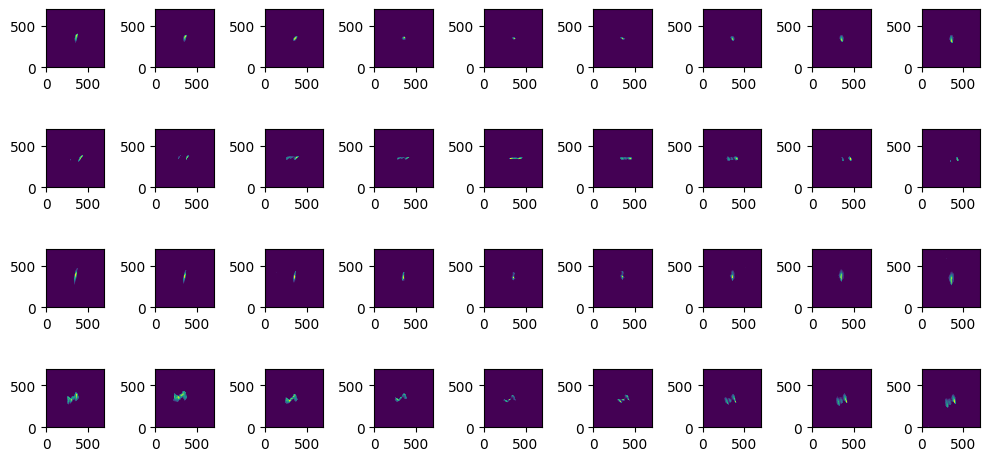

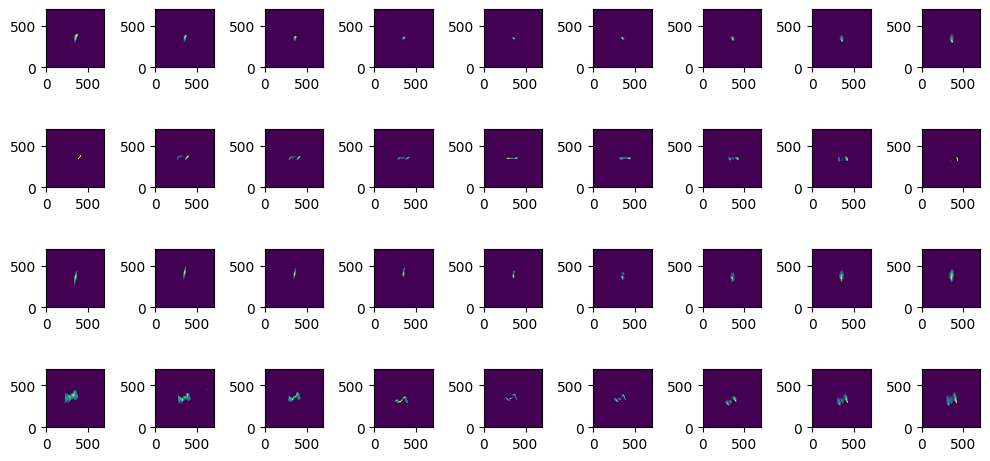

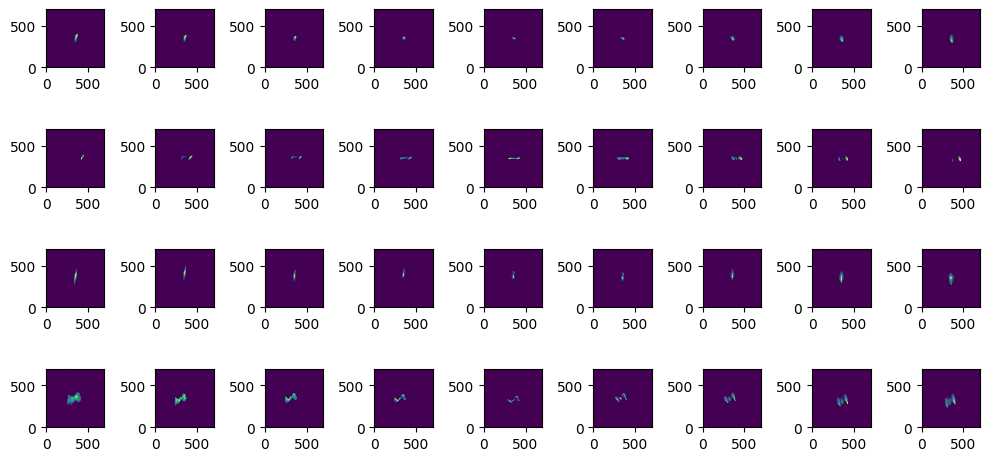

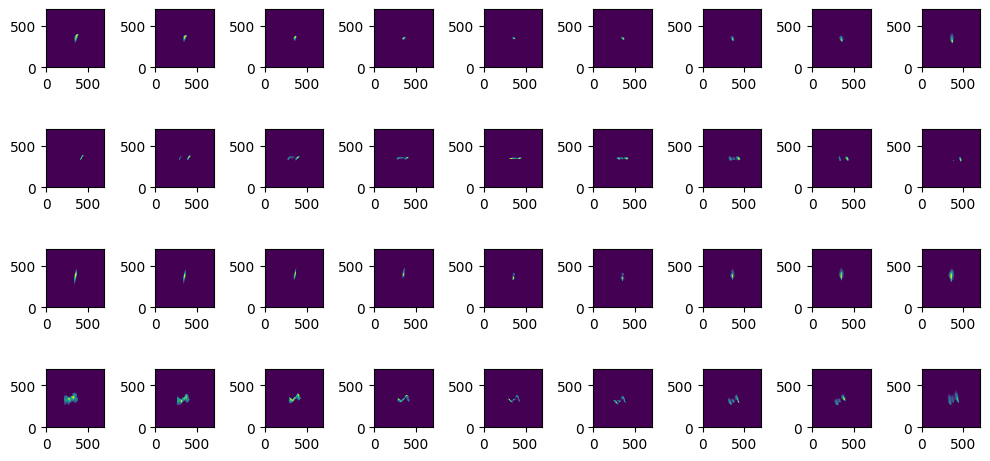

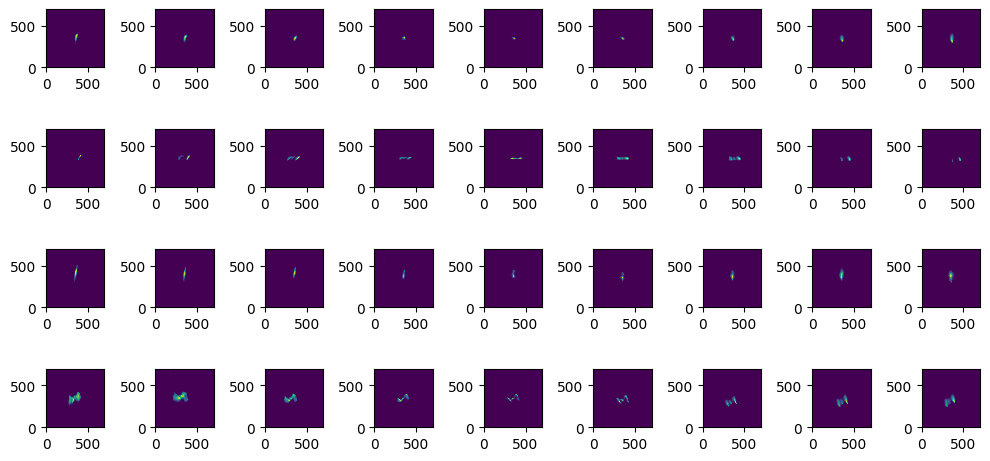

In [159]:
# plot curated dsets:
for n_img in range(dipole_off_pp_images.shape[-3]):
    fig, ax = plt.subplots(4, dipole_off_pp_images.shape[1], figsize=(10,5))
    for i in range(dipole_off_pp_images.shape[0]):
        for j in range(dipole_off_pp_images.shape[1]):
            ax[i,j].imshow(dipole_off_pp_images[i,j,n_img].T, origin='lower', interpolation='none')
            ax[i+2,j].imshow(dipole_on_pp_images[i,j,n_img].T, origin='lower', interpolation='none')
    plt.tight_layout()
    plt.show()

## **TASK**

Modify the code above to print which quad strength corresponds to which column and which tdc+dipole combination to each row.

Modify the code above to make it look better. You can remove the x and y ticks so that the images look larger

In [ ]:
## INSERT YOUR CODE HERE
